In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# training set
train_original = pd.read_csv("/kaggle/input/titanic/train.csv")
# test set
test_original = pd.read_csv("/kaggle/input/titanic/test.csv")

In [13]:
train_original.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
train_original.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


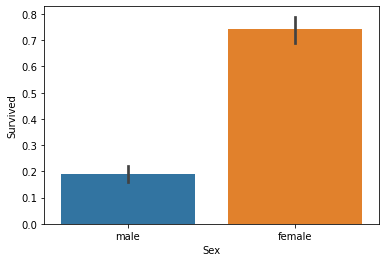

In [15]:
#Exploratory Analysis

sns.barplot(x='Sex', y='Survived', data=train_original)

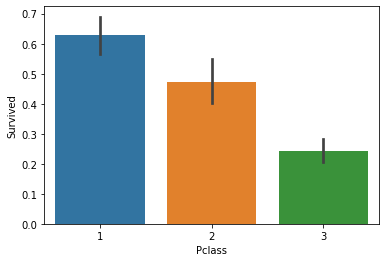

In [16]:
sns.barplot(x='Pclass', y='Survived', data=train_original)

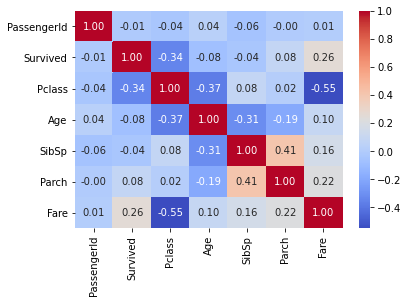

In [17]:
sns.heatmap(train_original.corr(), annot=True, fmt = ".2f", cmap = "coolwarm")

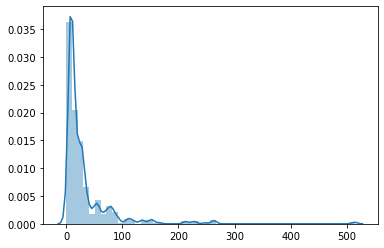

In [18]:
sns.distplot(train_original['Fare'] + train_original['Survived'])

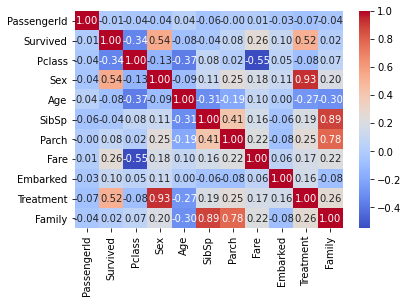

In [19]:
def getTreatment(name):
    if "mr." in name.lower():
        return 1
    elif "mrs." in name.lower():
        return 2
    elif "miss." in name.lower():
        return 3

def copyData(dt):
    dt_copy = dt.copy()
    dt_copy['Treatment'] = [getTreatment(x) for x in dt_copy["Name"]]
    dt_copy['Sex'] = pd.factorize(dt_copy['Sex'])[0]
    dt_copy['Embarked'] = pd.factorize(dt_copy['Embarked'])[0]
    dt_copy['Family'] = dt_copy['SibSp'] + dt_copy['Parch']
    return dt_copy

train = copyData(train_original)
sns.heatmap(train.corr(), annot=True, fmt = ".2f", cmap = "coolwarm")

In [20]:
features = [x for x in train.columns if x not in ['Survived','Cabin','Ticket','PassengerId','Name','SibSp','Sex']]
# ,'SibSp','Sex','Family'
test = copyData(test_original)

my_imputer = SimpleImputer()
imputed_train = my_imputer.fit_transform(train[features])
imputed_test = my_imputer.transform(test[features])

In [21]:
clf = RandomForestClassifier(n_jobs=2, min_samples_split=3, min_samples_leaf=3, max_leaf_nodes=250, min_impurity_decrease=0.01)
clf.fit(imputed_train, train['Survived'])

RandomForestClassifier(max_leaf_nodes=300, min_impurity_decrease=0.01,
                       min_samples_leaf=3, min_samples_split=3, n_jobs=2)

In [22]:
result = clf.predict(imputed_test)

output = pd.DataFrame({'PassengerId': test_original.PassengerId,'Survived': result})
output.to_csv('submission.csv', index=False)